In [1]:
%matplotlib inline
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression

# Load and prepare the dataset
### Load the dataset into a dataframe named df_data.

In [2]:
df_data = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/parkinsons.data')

In [3]:
df_data.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335



### Drop the name column. This column is not a feature required by the model.


In [4]:
df_data.drop(columns=['name'],inplace=True)
df_data.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


### Create a dataframe named X containing all the columns except the status.


In [5]:
X = df_data.drop(columns=['status'])
X.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.02971,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.04368,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.03590,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.03772,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.04465,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


### Create a dataframe named y containing the status.

In [6]:
y = df_data['status']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: status, dtype: int64

In [7]:
X.shape

(195, 22)

### Split the dataset into a training set and a test set

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=55)

# Create the model
### Instantiate a Logistic Regression classifier with a lbfgs solver and penalty set to 'none'.

In [9]:
logit = LogisticRegression(solver='lbfgs', penalty='none', max_iter=1000, random_state=55)

### Fit the classifier to the data.

In [10]:
logit.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='none',
                   random_state=55, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

# Calculate Accuracy
### Calculate and print the accuracy of the model on the test data.

In [11]:
print(f'Training score {logit.score(X_train, y_train)}')
print(f'Test score: {logit.score(X_test,y_test)}')

Training score 0.910958904109589
Test score: 0.7755102040816326


# L2 Regularization
### Train another model with L2 regularization and compare the accuracy of the new model to the previous one.

In [12]:
params = {'solver':'lbfgs', 
          'penalty':'l2', 
          'max_iter':1000, 
          'random_state':55}

l2_regularized = LogisticRegression(**params)
l2_regularized.fit(X_train, y_train)
                                    
print(f'Training score {l2_regularized.score(X_train, y_train)}')
print(f'Test score: {l2_regularized.score(X_test,y_test)}')

Training score 0.8767123287671232
Test score: 0.8163265306122449


# Choose the C parameter
### Use a loop to test the effect of varying the C parameter from 0.05 to 1.5 in increments of 0.5. Plot a graph to show the accuracy on the test data versus the accuracy on the training data. Select an appropriate value for C and explain why that may be the best value.

Training score c=0.05: 0.8561643835616438
Test score c=0.05: 0.8571428571428571
Training score c=0.55: 0.8835616438356164
Test score c=0.55: 0.8163265306122449
Training score c=1.05: 0.8767123287671232
Test score c=1.05: 0.8163265306122449
Training score c=1.5: 0.8835616438356164
Test score c=1.5: 0.8163265306122449


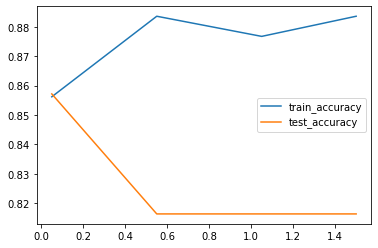

In [13]:
params = {'solver':'lbfgs', 
          'penalty':'l2', 
          'max_iter':1000, 
          'random_state':55,
          'C':0}

c_params = [0.05, 0.55, 1.05, 1.5]
test_accuracy = []
train_accuracy = []
for c in c_params:
    params['C'] = c
    l2_regularized = LogisticRegression(**params)
    l2_regularized.fit(X_train, y_train)
    train_accuracy.append(l2_regularized.score(X_train, y_train))
    test_accuracy.append(l2_regularized.score(X_test,y_test))
    print(f'Training score c={c}: {l2_regularized.score(X_train, y_train)}')
    print(f'Test score c={c}: {l2_regularized.score(X_test,y_test)}')
    
plt.plot(c_params, train_accuracy)
plt.plot(c_params, test_accuracy)
plt.legend(['train_accuracy','test_accuracy'])
    

C=0.05 is the provides the best results. A low value of c represents higher regularization. From the plot above we can see that lower regularization improves the training score but not the test score.